In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

print("Path to dataset files:", path)

import os
file_names = os.listdir(path)
print("Files in dataset directory:", file_names)

Path to dataset files: C:\Users\uniat\.cache\kagglehub\datasets\johnsmith88\heart-disease-dataset\versions\2


In [3]:
df = pd.read_csv(path + "//heart.csv")
df_copy = df.copy()
df_copy.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<a name="section-one"></a>
# **EDA (Exploratory Data Analysis)**

In [4]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
print(f'Shape     : {df_copy.shape}\n'
      f'Size      : {df_copy.size}\n'
      f'Dimension : {df_copy.ndim}')

Shape     : (1025, 14)
Size      : 14350
Dimension : 2


In [6]:
df_copy.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df_copy.duplicated().sum()

723

In [8]:
df_copy.loc[df_copy.duplicated(keep=False), :]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [9]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [10]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [11]:
df_copy

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [12]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

<a name="section-two"></a>
# **Data Visualization**

In [13]:
df_copy['sex'].replace({0:'FEMALE', 1:'MALE'}, inplace=True)
df_copy['cp'].replace({0:'Asymptomatic', 1:'Typical Angina', 2:'Atypical Angina', 3:'Non-anginal Pain'}, inplace=True)
df_copy['fbs'].replace({0:'False', 1:'True'}, inplace=True)
df_copy['restecg'].replace({0:'Hypertrophy', 1:'Normal', 2:'ST-T Wave Abnormality'}, inplace=True)
df_copy['exang'].replace({0:'NO', 1:'YES'}, inplace=True)
df_copy['slope'].replace({0:'Downsloping', 1:'Flat', 2:'Upsloping'}, inplace=True)
df_copy['thal'].replace({1:'Fixed Defect', 2:'Normal', 3:'Reversable Defect'}, inplace=True)
df_copy['exang'].replace({0:'NO', 1:'YES'}, inplace=True)
df_copy['target'].replace({0:'Less Chance', 1:'More Chance'}, inplace=True)

<a name="section-four"></a>
### **Categorical Analysis**

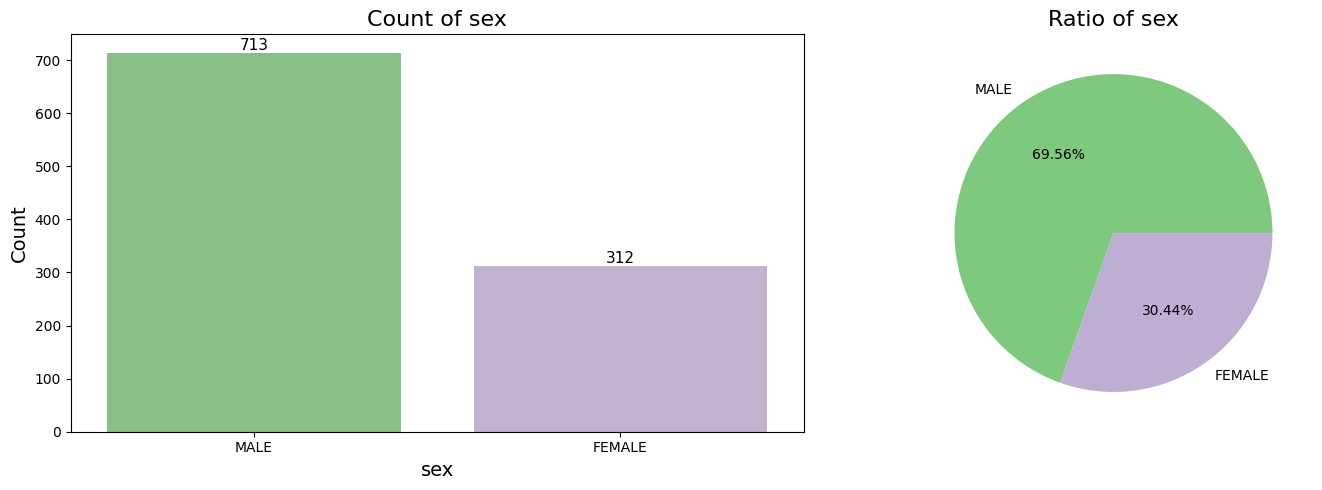

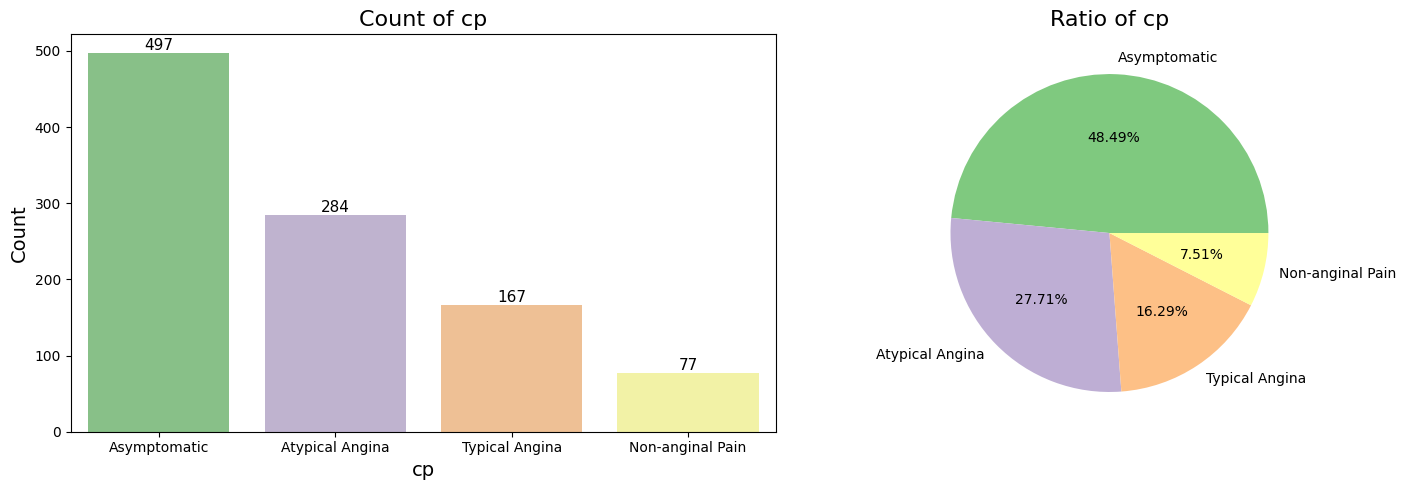

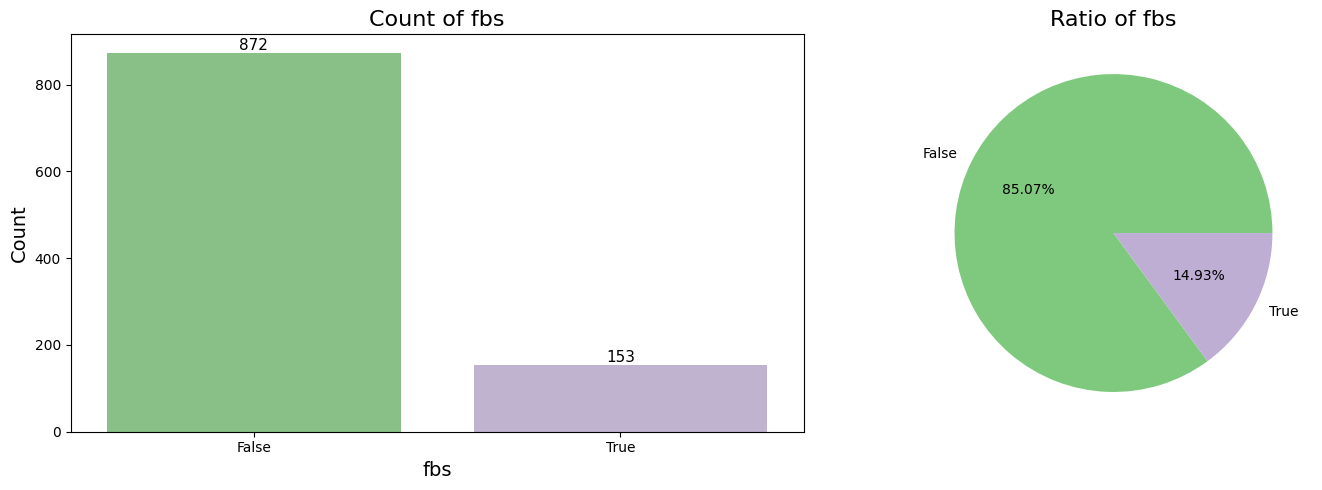

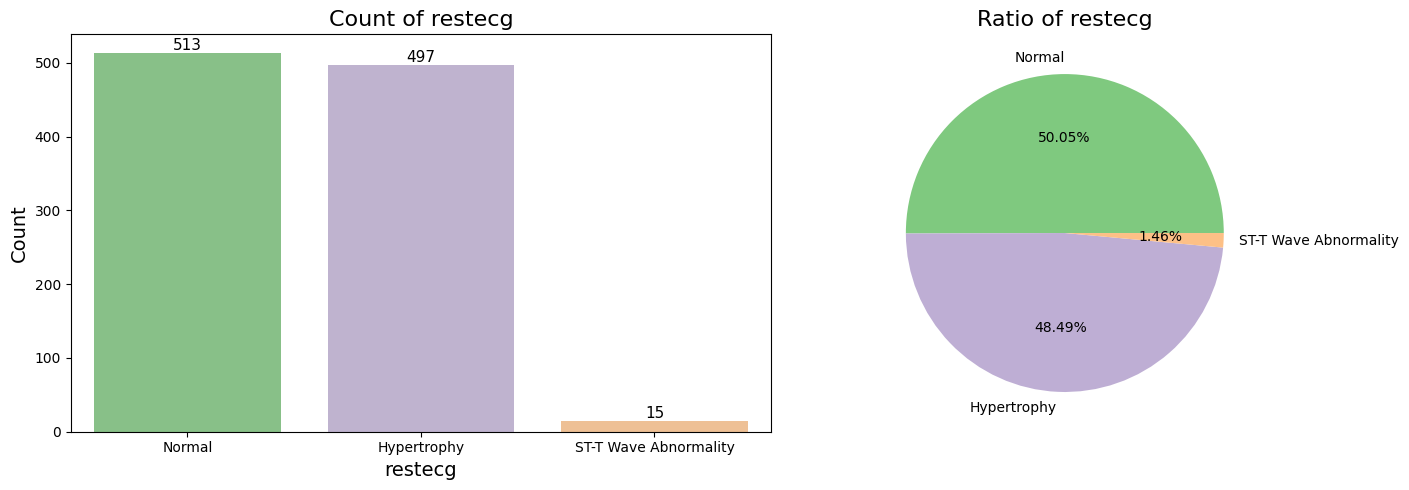

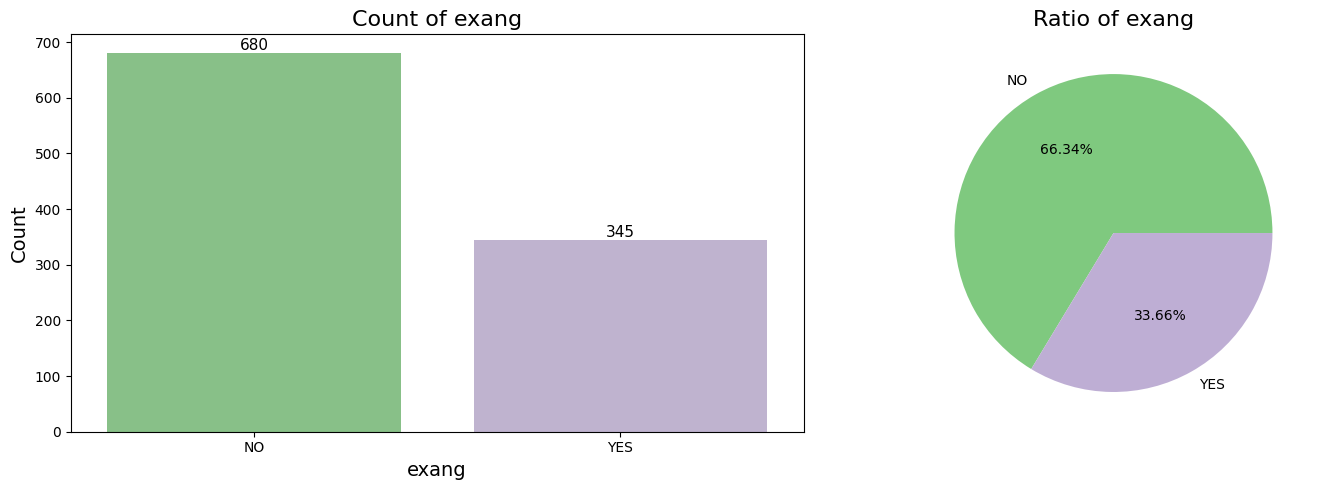

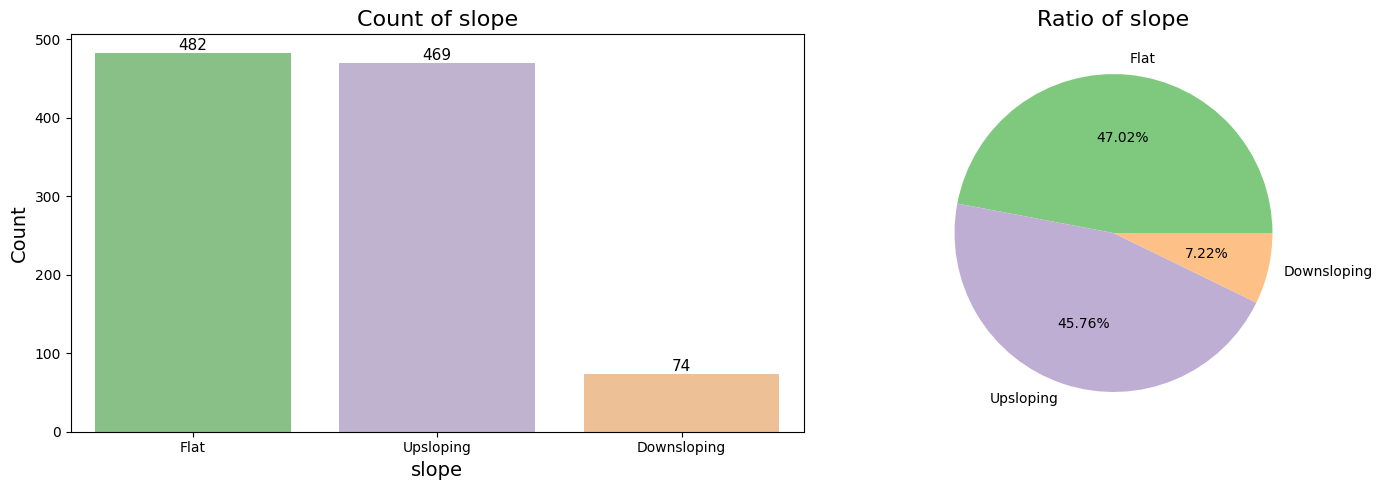

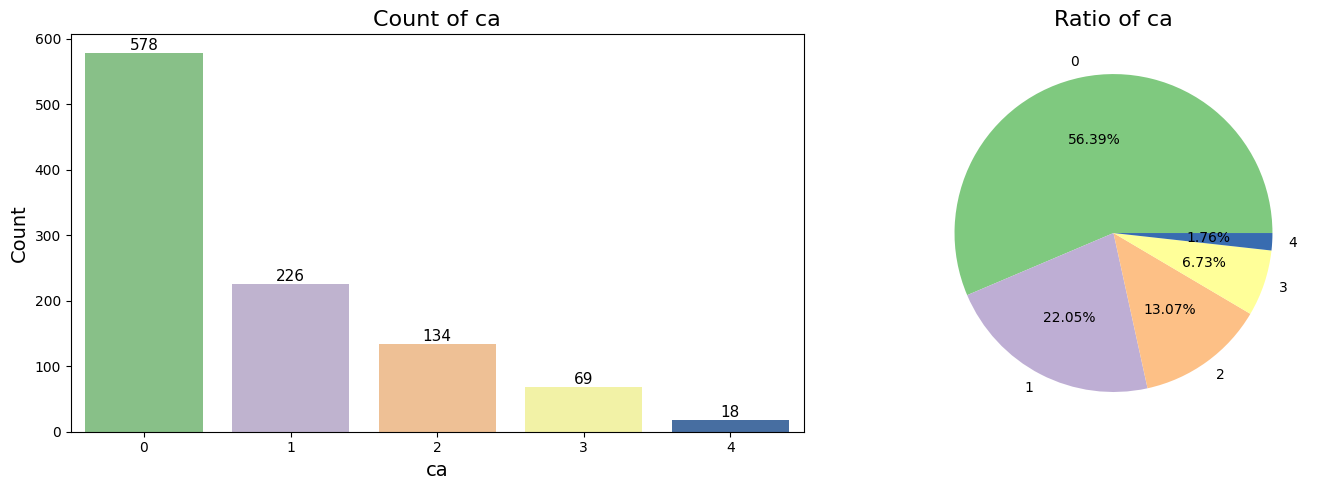

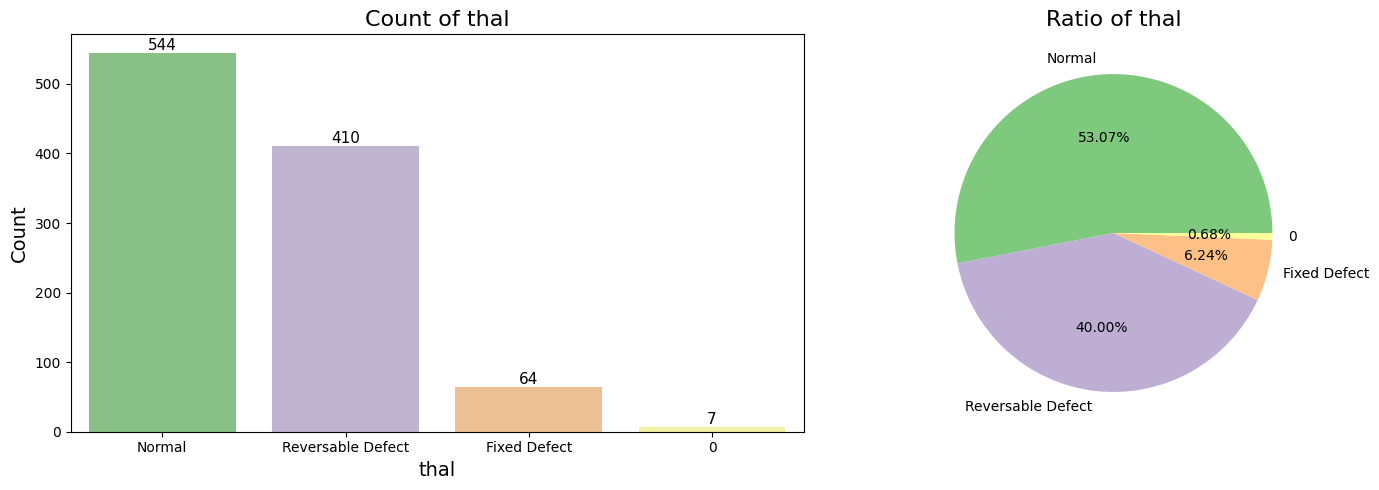

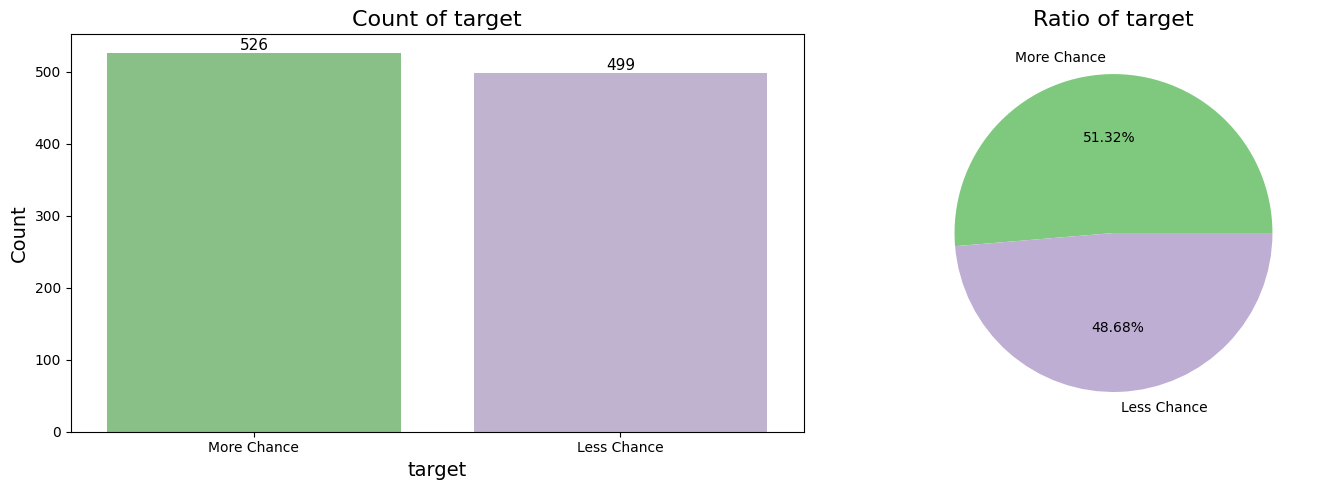

In [14]:
palette_color = sns.color_palette('Accent')

for col in df_copy[cat_cols]:
  fig, axs = plt.subplots(1,2, figsize = (15, 5))

# Countplot
  ax = sns.countplot(data=df_copy,
                     x=df_copy[col],
                     ax = axs[0],
                     order = df_copy[col].value_counts().index,
                     palette='Accent')

  for container in ax.containers:
      ax.bar_label(container, fontsize=11)

  ax.set_xlabel(f'{col}', fontsize=14)
  ax.set_ylabel('Count', fontsize=14)
  axs[0].set_title(f"Count of {col}", fontsize=16)

# Pie plot
  ax2 = df_copy[col].value_counts().plot.pie(
                                             ylabel='',
                                             ax = axs[1],
                                             colors=[palette_color[i] for i in range(df_copy[col].nunique())],
                                             autopct='%.2f%%')
  axs[1].set_title(f"Ratio of {col}", fontsize=16)
  plt.tight_layout()

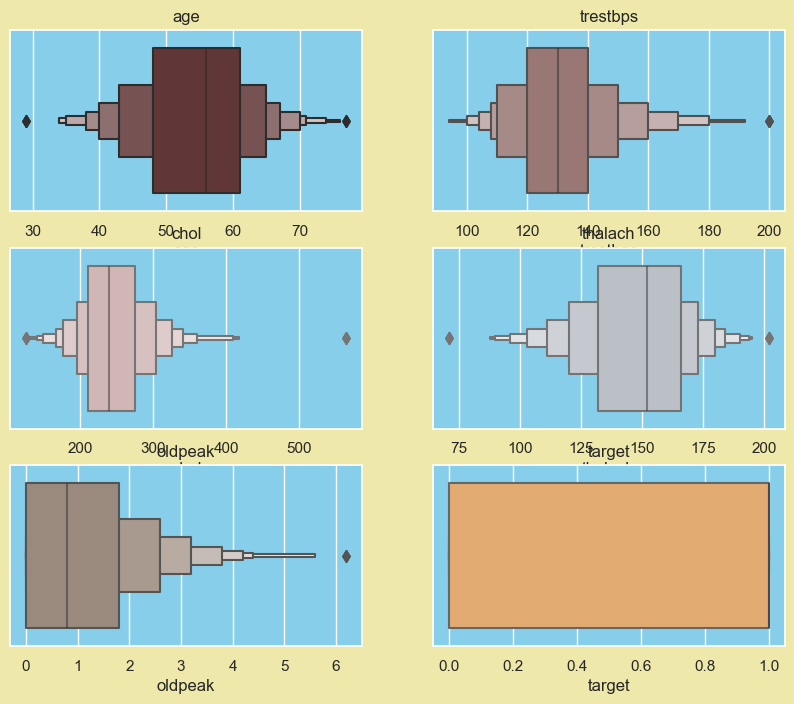

In [23]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
sns.set(rc={"axes.facecolor":"#87CEEB","figure.facecolor":"#EEE8AA"})  # Change figure background color

palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

plt.figure(figsize=(10,8))

for i, col in enumerate(num_cols):
    plt.subplot(3,2, i+1)
    sns.boxenplot(x=df[col], color=palette[i % len(palette)])  # Use modulo to cycle through colors
    plt.title(col)
    
plt.show()

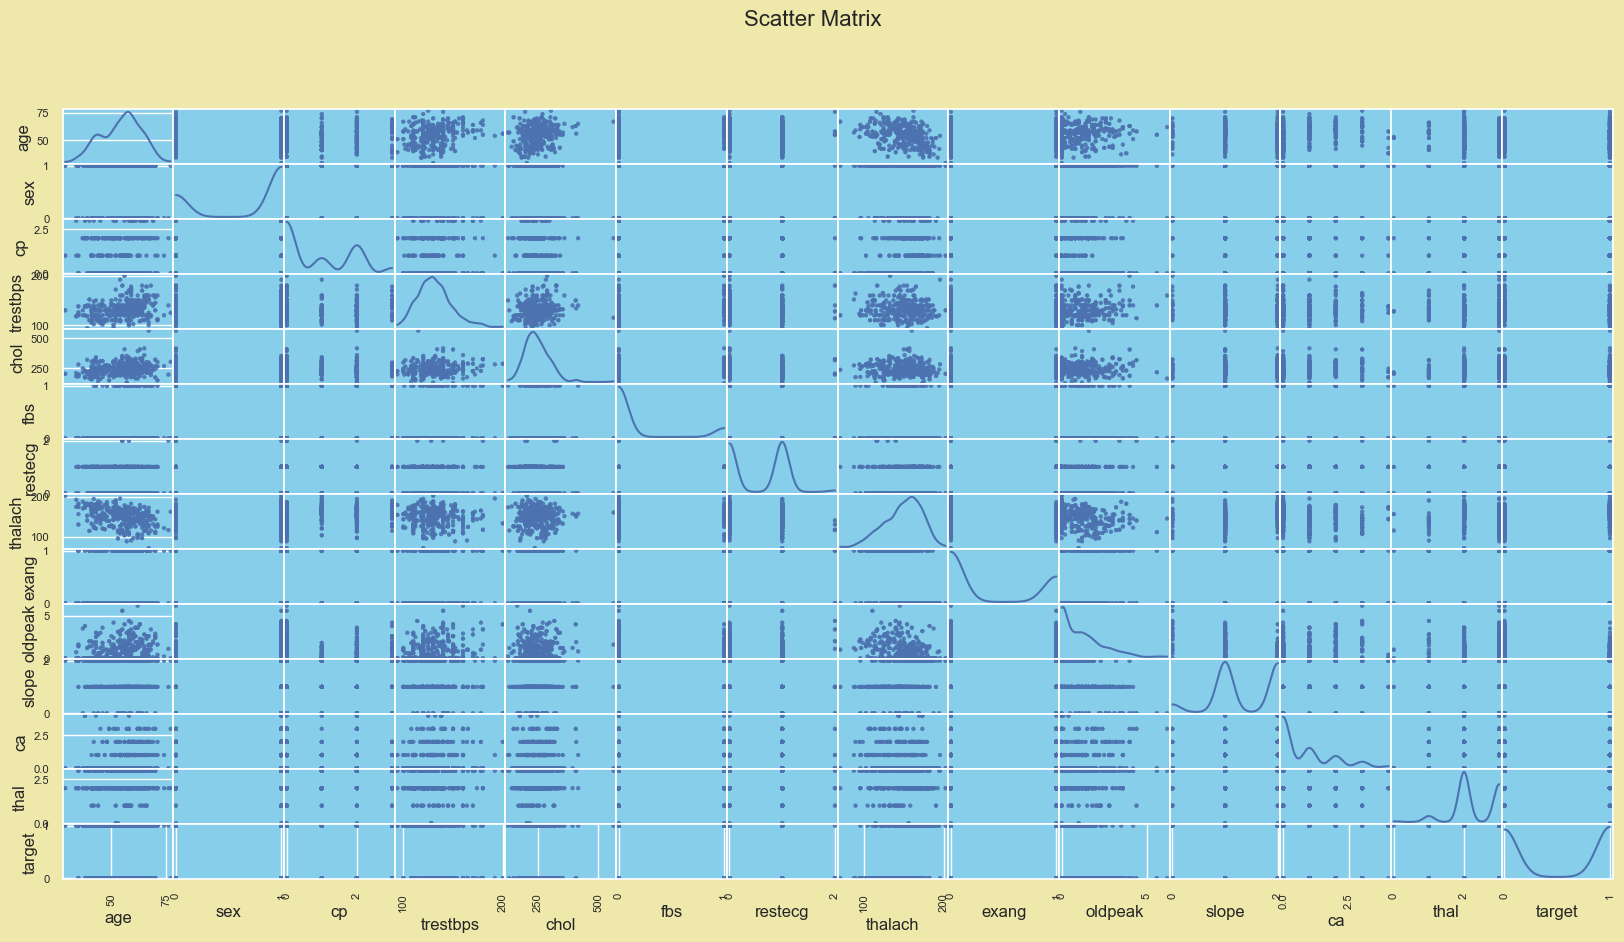

In [25]:
import seaborn as sns
def plotScatterMatrix(df, width, height):
    scatter_matrix = pd.plotting.scatter_matrix(df, figsize=(width, height), diagonal='kde', alpha=0.5)
    plt.suptitle('Scatter Matrix', fontsize=16)
    plt.show()
plotScatterMatrix(df, 20, 10)

<a name="section-five"></a>
### **Numerical Analysis**

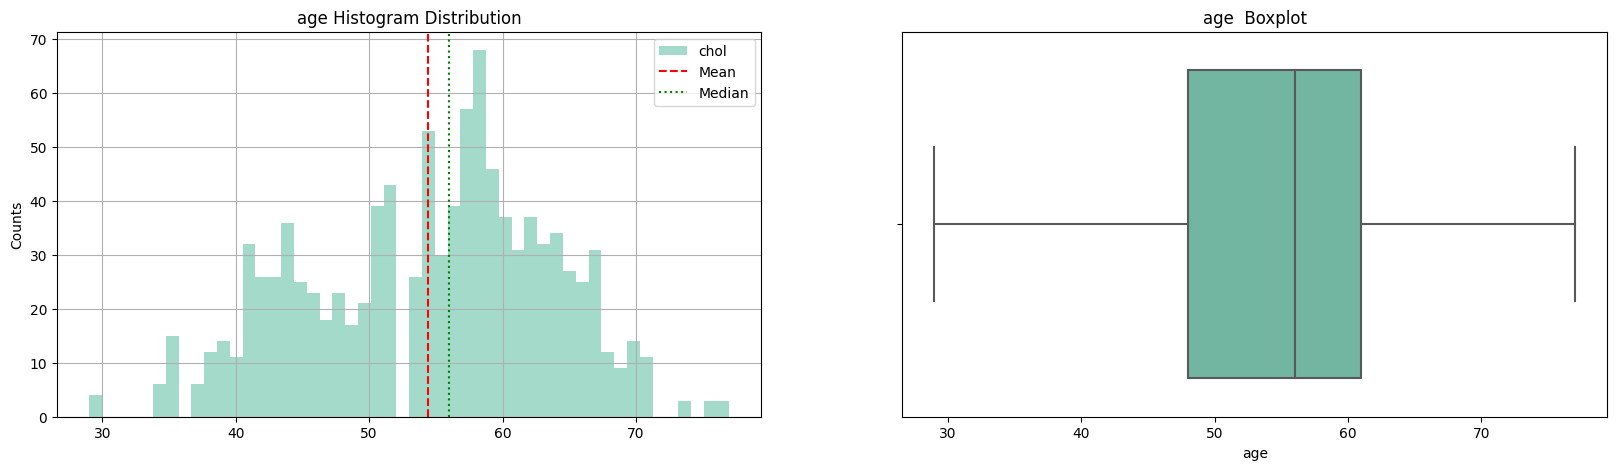

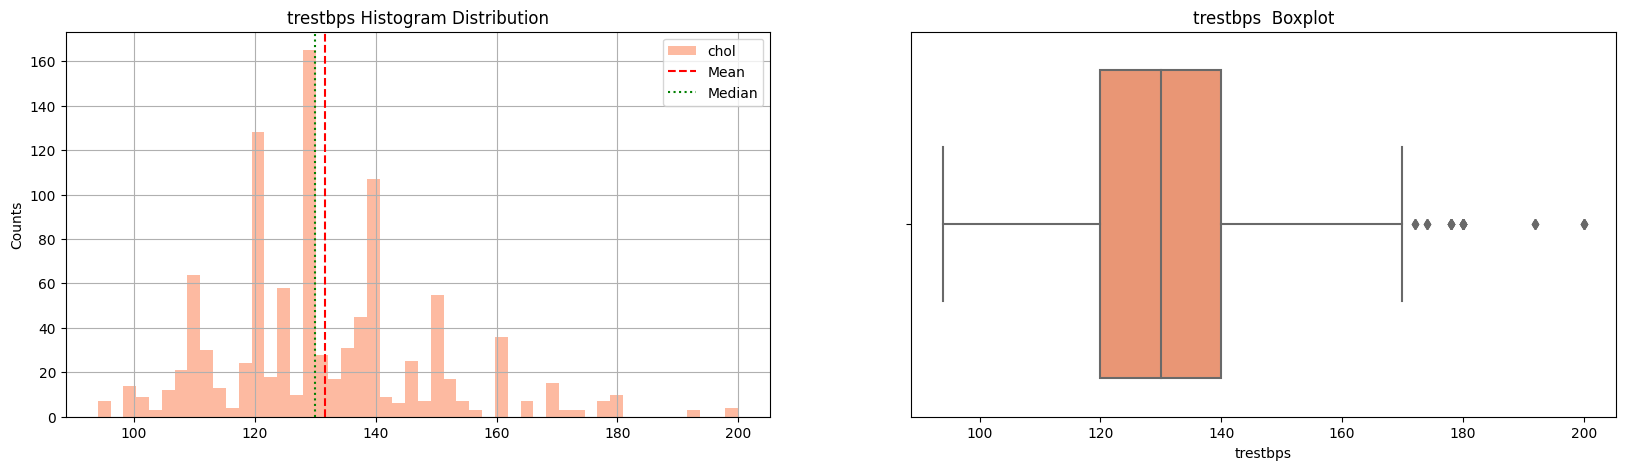

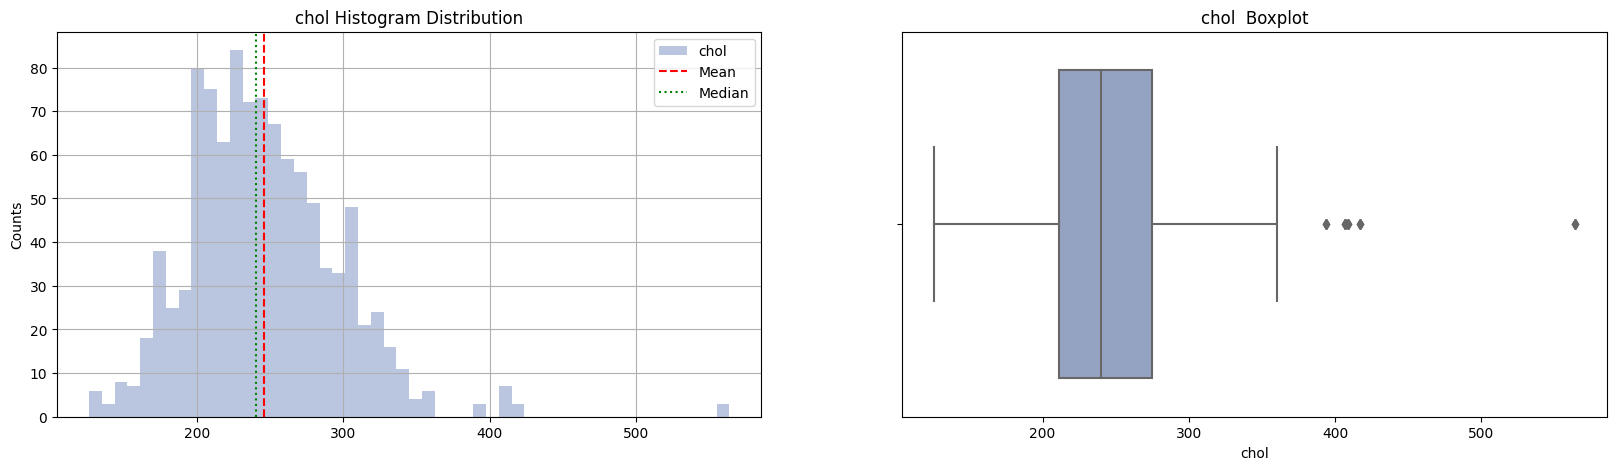

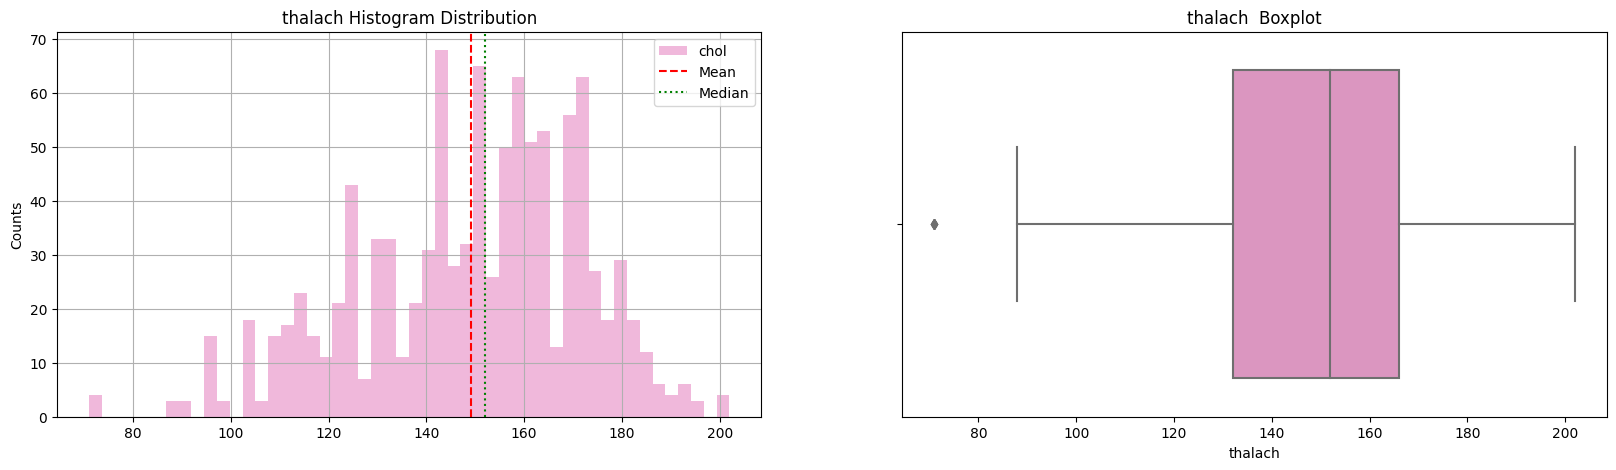

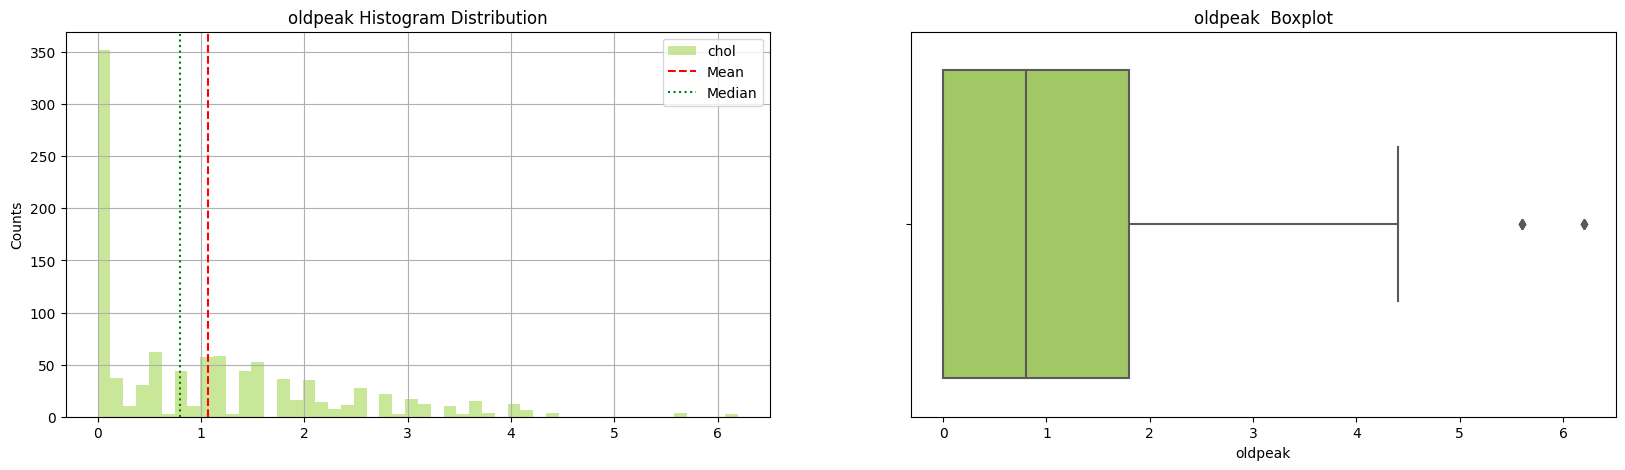

In [15]:
palette_color = sns.color_palette('Set2')

for idx, col in enumerate(df_copy[num_cols]):
  plt.figure(figsize=(20, 5))

  plt.subplot(1, 2, 1)
  df_copy[col].hist(bins=50, label='chol', alpha=0.6, color=palette_color[idx])
  plt.axvline(np.mean(df_copy[col]), ls='--', c='r', label="Mean")
  plt.axvline(np.median(df_copy[col]), ls=':', c='g', label="Median")
  plt.ylabel("Counts")
  plt.title(f"{col} Histogram Distribution")
  plt.legend()

  plt.subplot(1, 2, 2)
  sns.boxplot(x=df_copy[col], data=df_copy, color=palette_color[idx])
  plt.title(f"{col}  Boxplot")

<a name="section-seven"></a>
### **Categoric vs Target**

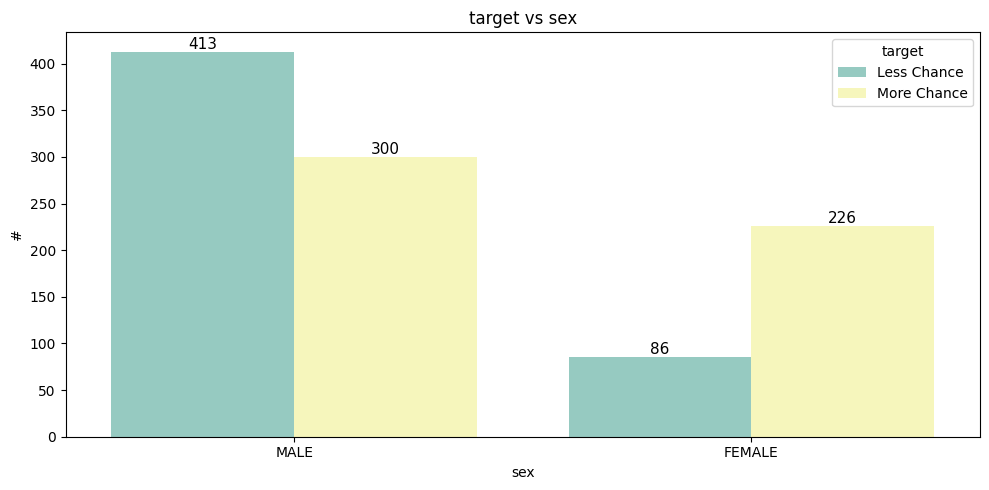

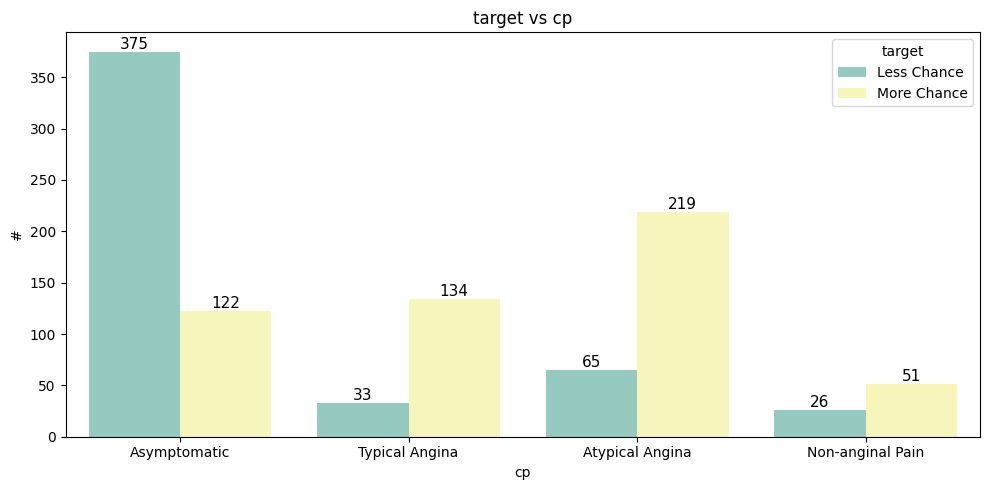

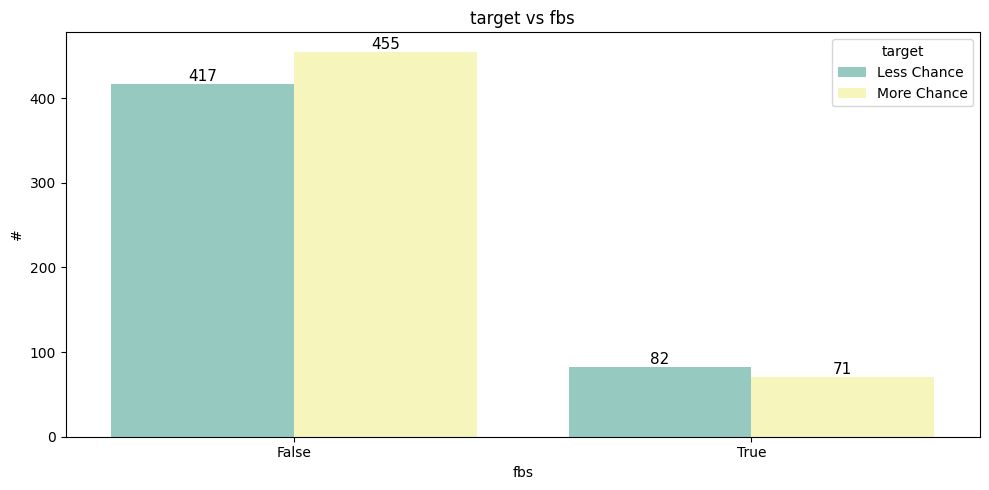

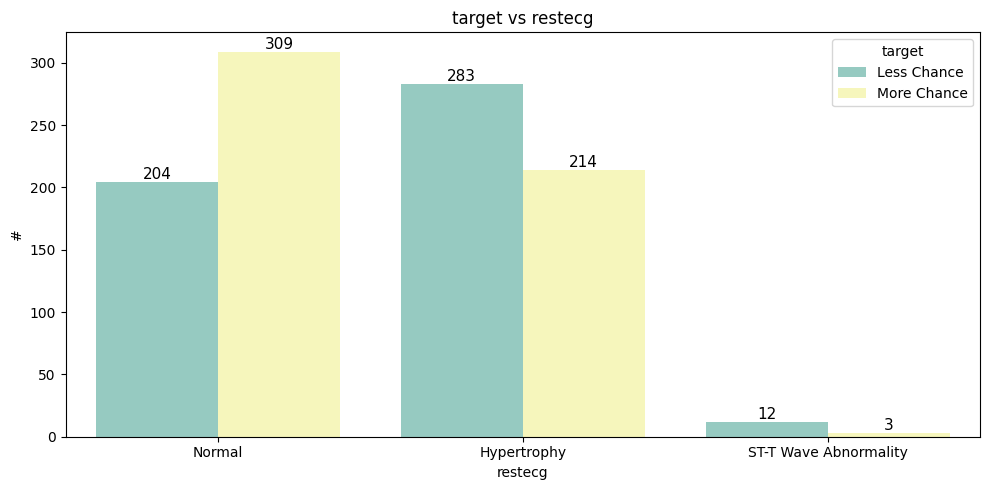

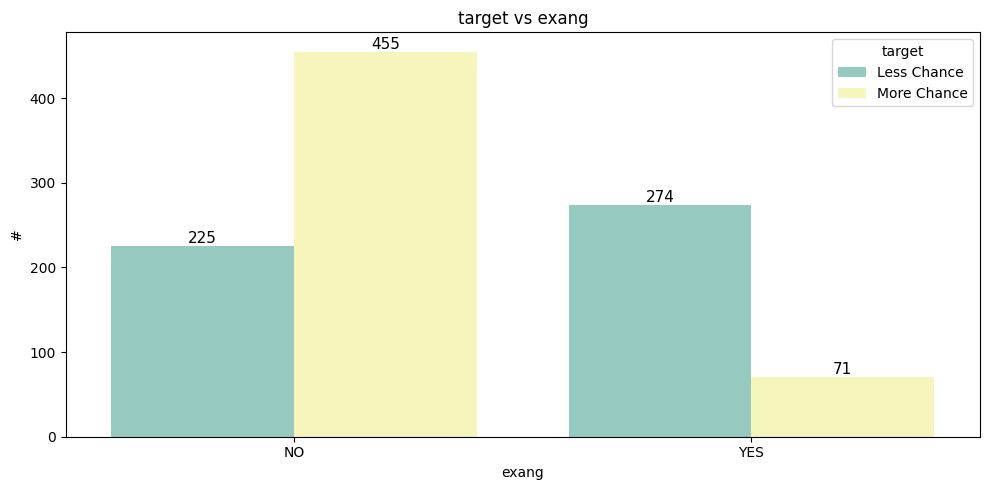

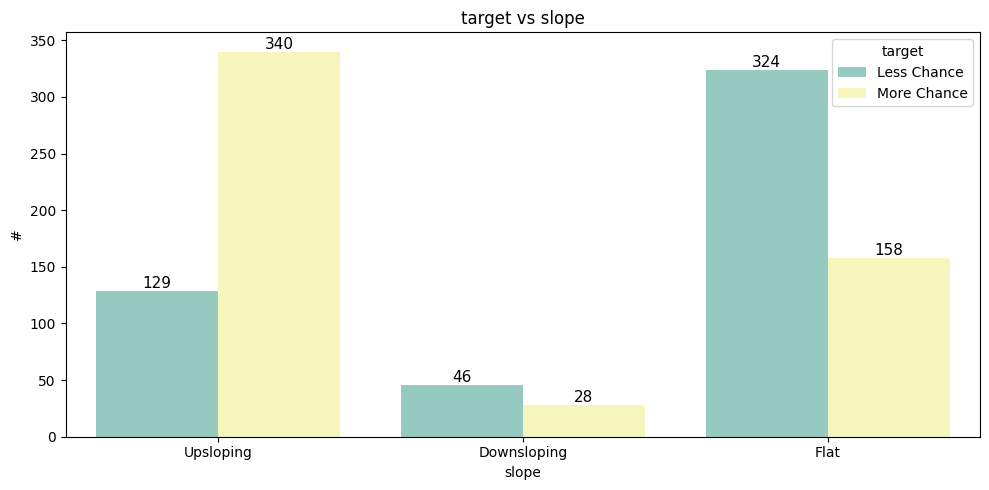

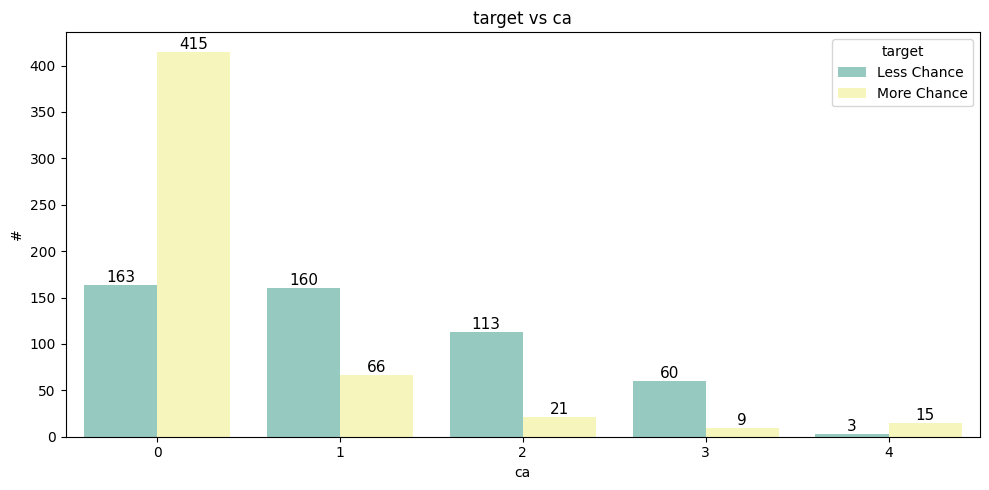

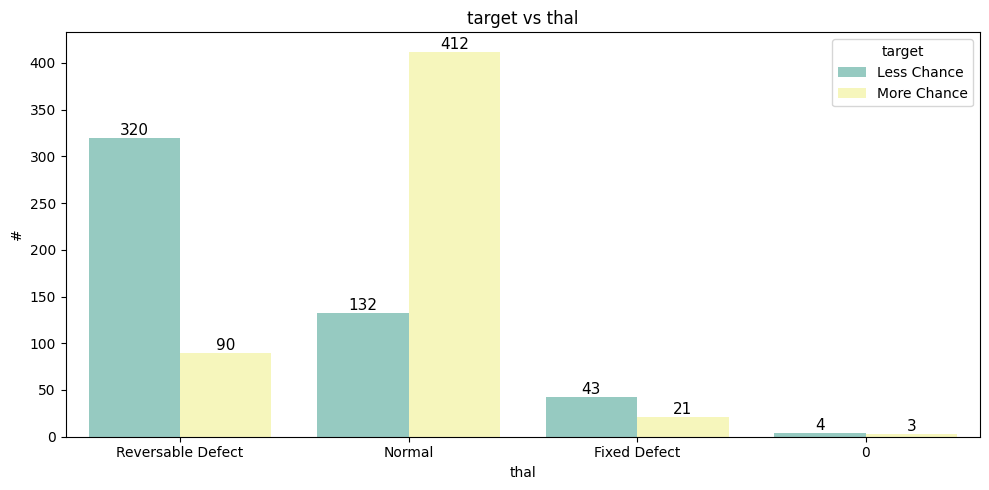

In [16]:
for col in cat_cols:
  if col == 'target':
    pass
  else:
    plt.subplots(1,1, figsize = (10, 5))
    ax = sns.countplot(data=df_copy,
                  x=df_copy[col],
                  hue=df_copy['target'],
                  palette="Set3");
    for container in ax.containers:
      ax.bar_label(container, fontsize=11)
    plt.title(f"target vs {col}")
    plt.ylabel("#")
    plt.xlabel(f"{col}");
    plt.tight_layout()

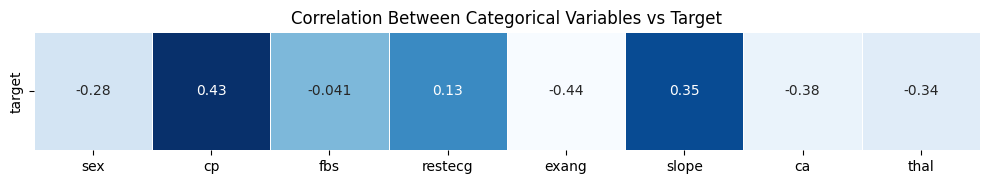

In [17]:
plt.figure(figsize=(10,2))
corr_mx = df[cat_cols].corr()
corr_mx = corr_mx.iloc[:-1, [-1]].T
sns.heatmap(corr_mx,
            linewidths=0.5,
            square=True,
            cmap="Blues",
            cbar=False,
            annot=True)
plt.title("Correlation Between Categorical Variables vs Target")
plt.tight_layout()

<a name="section-eight"></a>
### **Numeric vs Target**

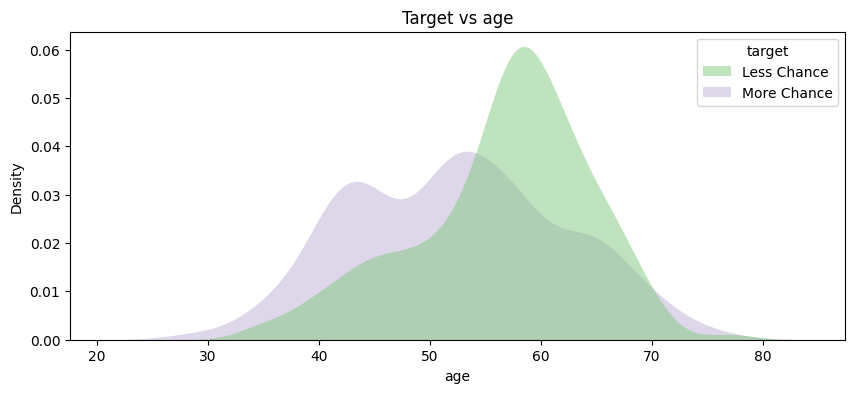

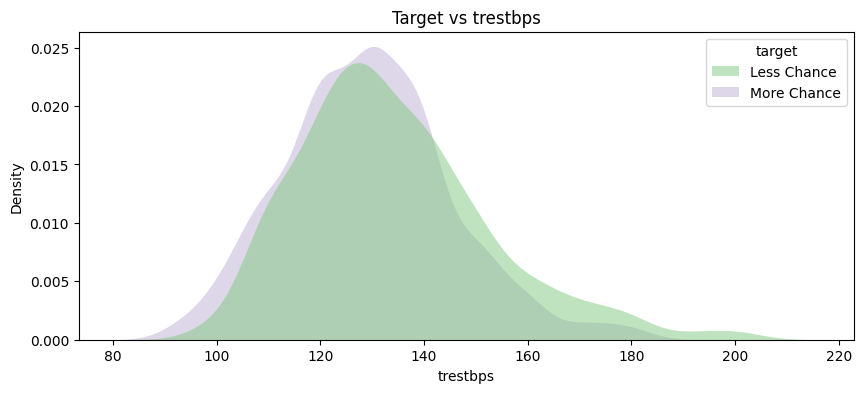

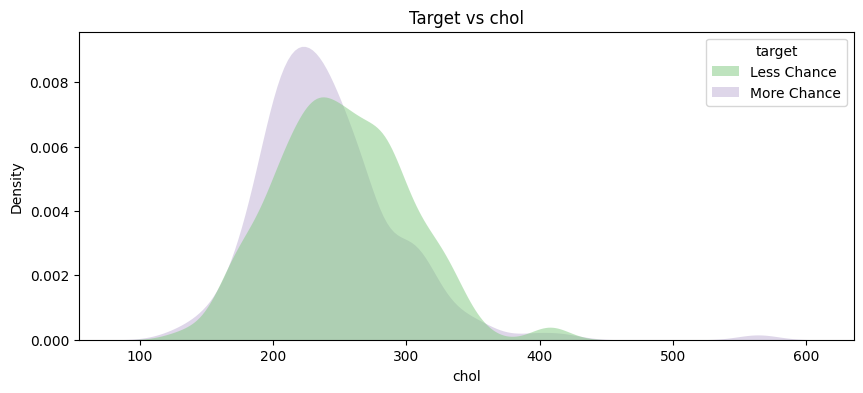

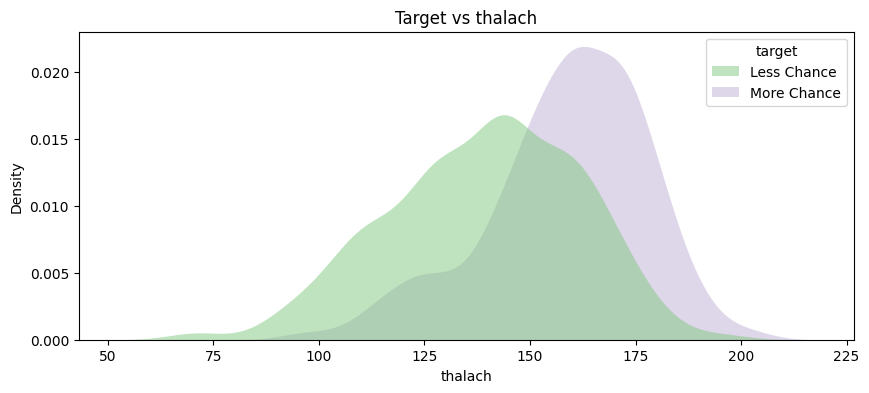

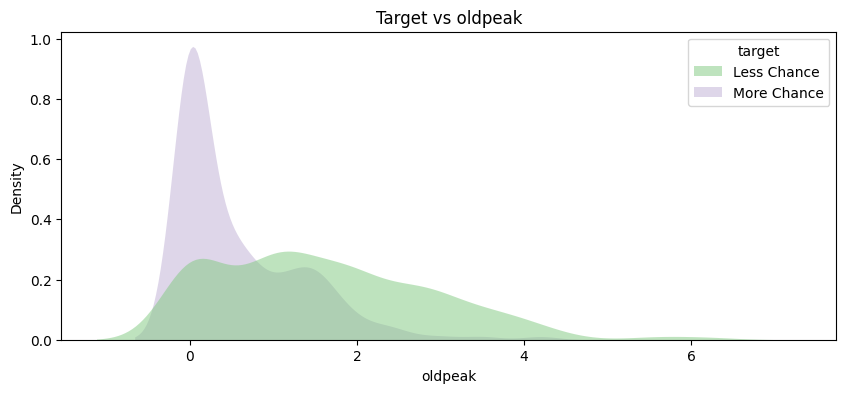

In [18]:
for col in num_cols:
  plt.subplots(1,1, figsize = (10, 4))
  sns.kdeplot(data=df_copy, x=col, hue="target",
              fill=True, common_norm=False, palette="Accent",
              alpha=.5, linewidth=0)
  plt.title(f"Target vs {col}")

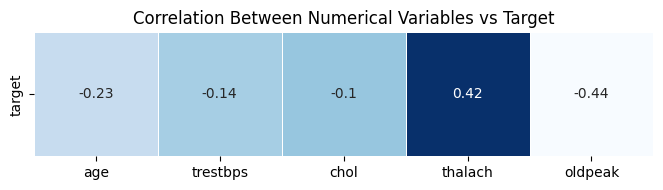

In [19]:
num_cols.append('target')

plt.figure(figsize=(10,2))
corr_mx = df[num_cols].corr()
corr_mx = corr_mx.iloc[:-1, [-1]].T
sns.heatmap(corr_mx,
            linewidths=0.5,
            square=True,
            cmap="Blues",
            cbar=False,
            annot=True)
plt.title("Correlation Between Numerical Variables vs Target")
plt.tight_layout()

<a name="section-nine"></a>
## **Multi-variate Analysis**

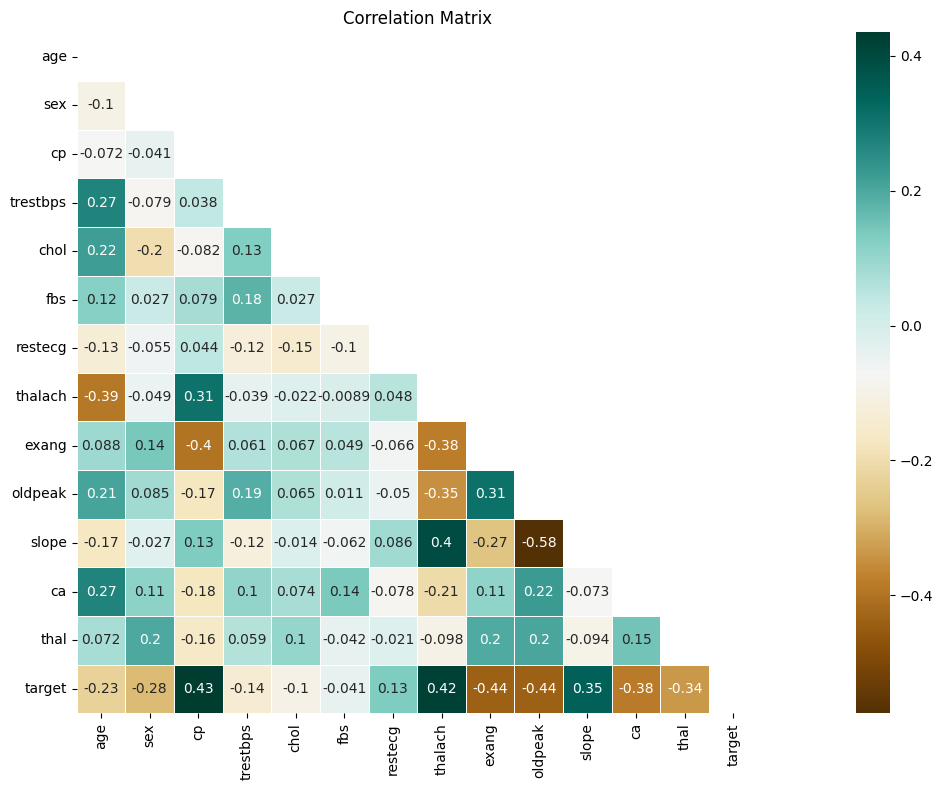

In [20]:
plt.figure(figsize=(20,8))
corr_mx = df.corr()
mask = np.triu(corr_mx)
sns.heatmap(corr_mx,
            linewidths=0.5,
            square=True,
            cmap="BrBG",
            mask=mask,
            annot=True)
plt.title("Correlation Matrix")
plt.tight_layout()